# Reducción de dimensionalidad: Clases

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler

## Dataset: Cancer
En la presente actividad se realizará una selección y extracción de variables de un conjunto de datos relacionado con cancer de pecho ([conjunto de datos](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)). Este contiene información de imagenes tomadas a tumores, en específico sobre la descripción de los núcleos de las células presentes. Los análisis realizados sobre este conjunto de datos usualmente tienen por objetivo la predicción del tipo de tumor (benigno/maligno).

Previo al análisis, te sugerimos revisar el enlace propuesto para conocer el conjunto de datos.

In [3]:
cancer = datasets.load_breast_cancer()

In [4]:
df = pd.DataFrame(data = cancer.data, columns = cancer.feature_names)
df["target"] = cancer.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


Completa los siguientes pasos para realizar un análisis para la selección y extracción de características previo al modelado.

## Reescalamiento
### 1. Realizar el reescalamiento de las características numéricas.

In [5]:
num_cols = df.columns[:-1]
feature_names = num_cols

In [6]:
std_sclr = StandardScaler()

In [7]:
df_ss = df.copy()

In [8]:
df_ss[feature_names] = std_sclr.fit_transform(df_ss[feature_names])
df_ss.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015,0
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190,0
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391,0
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010,0
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100,0


## Selección de Características
### 2. Utilizando KBest, seleccione las características más relevantes para la predicción. Nota que en este se está realiza un modelo de clasificación. 

In [9]:
feature_selector = SelectKBest(score_func=f_classif, k='all')
feature_selector.fit(df_ss[feature_names], df_ss["target"])

SelectKBest(k='all')

In [10]:
for i in range(len(feature_selector.scores_)):
    print("Característica {:d}: {:10f}".format(i+1, feature_selector.scores_[i]))

Característica 1: 646.981021
Característica 2: 118.096059
Característica 3: 697.235272
Característica 4: 573.060747
Característica 5:  83.651123
Característica 6: 313.233079
Característica 7: 533.793126
Característica 8: 861.676020
Característica 9:  69.527444
Característica 10:   0.093459
Característica 11: 268.840327
Característica 12:   0.039095
Característica 13: 253.897392
Característica 14: 243.651586
Característica 15:   2.557968
Característica 16:  53.247339
Característica 17:  39.014482
Característica 18: 113.262760
Característica 19:   0.024117
Característica 20:   3.468275
Característica 21: 860.781707
Característica 22: 149.596905
Característica 23: 897.944219
Característica 24: 661.600206
Característica 25: 122.472880
Característica 26: 304.341063
Característica 27: 436.691939
Característica 28: 964.385393
Característica 29: 118.860232
Característica 30:  66.443961


In [11]:
scores_sorted = sorted(feature_selector.scores_, reverse=True)

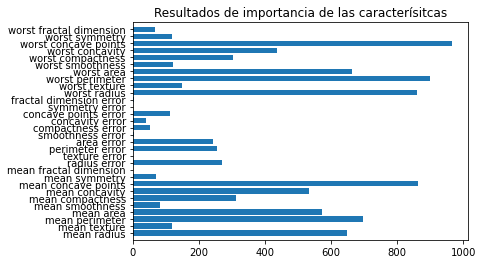

In [12]:
plt.barh([df_ss.columns[i] for i in range(len(feature_selector.scores_))], feature_selector.scores_)
plt.title("Resultados de importancia de las caracterísitcas")
plt.ylim(-1,30)
plt.show()

In [13]:
feature_selector = SelectKBest(score_func=f_classif, k=7)
feature_selector.fit(df_ss[feature_names], df_ss["target"])

SelectKBest(k=7)

In [14]:
data_transformed = feature_selector.transform(df_ss[feature_names])

In [15]:
cols_transformed = df_ss.columns[feature_selector.get_support(indices=True)]

In [16]:
df_KB = pd.DataFrame(data = data_transformed, columns=cols_transformed)
df_KB["target"] = df_ss.target
df_KB.head()

,mean radius,mean perimeter,mean concave points,worst radius,worst perimeter,worst area,worst concave points,target
0,1.097064,1.269934,2.532475,1.886690,2.303601,2.001237,2.296076,0
1,1.829821,1.685955,0.548144,1.805927,1.535126,1.890489,1.087084,0
2,1.579888,1.566503,2.037231,1.511870,1.347475,1.456285,1.955000,0
3,-0.768909,-0.592687,1.451707,-0.281464,-0.249939,-0.550021,2.175786,0
4,1.750297,1.776573,1.428493,1.298575,1.338539,1.220724,0.729259,0


## PCA
### 3. Utilizando PCA, determine las nuevas características y la cantidad necesarias para explicar el $95\%$ de la varianza.
#### 3.1 Cree una instancia del modelo de PCA y encuentre las nuevas características.

In [17]:
model = PCA()

In [18]:
model.fit(df_KB[cols_transformed])

PCA()

In [19]:
for i, val in enumerate(model.components_):
    print("Componente",i+1,"--¬","\n",val)

Componente 1 --¬ 
 [0.38504683 0.38847555 0.36107014 0.39047003 0.39288981 0.38267682
 0.34232038]
Componente 2 --¬ 
 [-0.27225413 -0.20176641  0.51306896 -0.21596202 -0.13739176 -0.26697969
  0.69651562]
Componente 3 --¬ 
 [ 0.37162238  0.39522882  0.51473109 -0.26103331 -0.23175582 -0.39944246
 -0.39917348]
Componente 4 --¬ 
 [-0.37169162 -0.3067076   0.56682797  0.02978929  0.02578699  0.49430085
 -0.44787961]
Componente 5 --¬ 
 [ 0.22170734  0.11726767 -0.10359611 -0.31202604 -0.66840559  0.58721362
  0.19343182]
Componente 6 --¬ 
 [-0.13947871  0.25124095 -0.08462929 -0.76801901  0.53538172  0.18287839
  0.01817318]
Componente 7 --¬ 
 [-0.65783761  0.69370597 -0.04745834  0.21131567 -0.1974481  -0.01132877
  0.00100619]


#### 3.2 Grafique la varianza explicada acumulada de las nuevas características y determine la cantidad de componentes para obtener una varianza explicada del $95\%$.

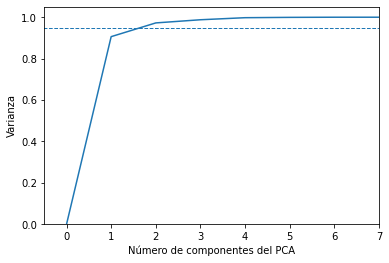

In [20]:
plt.plot(range(model.n_components_+1), np.insert(np.cumsum(model.explained_variance_ratio_),0,0))
plt.hlines(0.95, -1, 7, linestyle="dashed", linewidth=1)
plt.xlim(-0.5,7)
plt.ylim(0,1.05)
plt.ylabel('Varianza')
plt.xlabel('Número de componentes del PCA')
plt.show()

In [21]:
print("  Varianza Explicada")
print("=======================")
for i, val in enumerate(model.explained_variance_ratio_):
    print("Componente:",i+1,"->","{:.4f}".format(val))

  Varianza Explicada
Componente: 1 -> 0.9061
Componente: 2 -> 0.0664
Componente: 3 -> 0.0152
Componente: 4 -> 0.0099
Componente: 5 -> 0.0016
Componente: 6 -> 0.0007
Componente: 7 -> 0.0001


En base al gráfico y eligiendo el valor de corte de $95\%$, se eligieron 2 componentes principales para explicar la varianza.

In [22]:
pca = PCA(n_components=2)
pca.fit(df_KB[cols_transformed])

PCA(n_components=2)

#### 3.3 Transformar el dataset original con un nuevo modelo de PCA utilizando el número de componentes determinado en el paso anterior.

In [23]:
df_pca = pd.DataFrame(data = pca.transform(df_KB[cols_transformed]), columns=["feature_{}".format(i) for i in range(pca.n_components_)])
df_pca ["target"] = df_KB.target
df_pca.head(30)

,feature_0,feature_1,target
0,5.023738,1.085438,0
1,3.961311,-0.905586,0
2,4.298734,0.760292,0
3,0.324091,2.831188,0
4,3.629624,-0.384378,0
5,0.070734,1.378650,0
6,3.096382,-0.207069,0
7,0.355598,0.569656,0
8,0.526602,1.789472,0
9,0.262641,1.978424,0
